In [2]:
# Import Python Librarys 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
# Load dataset
df = pd.read_csv("C:/Users/meena/OneDrive/Documents/sales_before_after_discount.csv")

In [10]:
before = df['Sales_Before_Discount']
after = df['Sales_After_Discount']

In [11]:
# --- EDA ---

print(df.head())
print(df.describe())
print(df.isnull().sum())

   Store_ID  Sales_Before_Discount  Sales_After_Discount
0         1                 524.84                509.91
1         2                 493.09                632.61
2         3                 532.38                539.33
3         4                 576.15                487.11
4         5                 488.29                581.13
        Store_ID  Sales_Before_Discount  Sales_After_Discount
count  30.000000              30.000000             30.000000
mean   15.500000             490.592667            533.941333
std     8.803408              45.000108             46.554647
min     1.000000             404.340000            442.020000
25%     8.250000             470.450000            504.545000
50%    15.500000             488.290000            536.775000
75%    22.750000             518.012500            567.230000
max    30.000000             578.960000            632.610000
Store_ID                 0
Sales_Before_Discount    0
Sales_After_Discount     0
dtype: int64


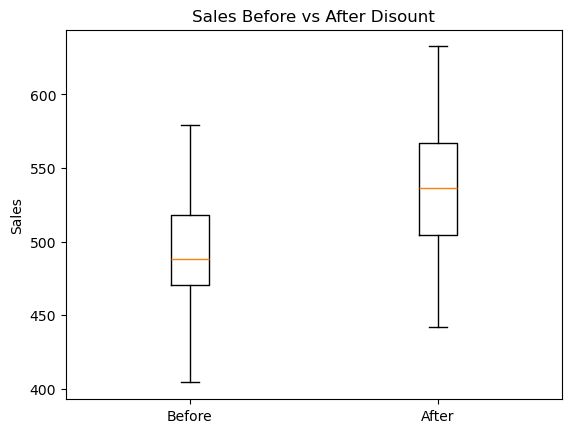

In [13]:
# --- Visualization ---

plt.boxplot([before, after], labels = ['Before', 'After'])
plt.title('Sales Before vs After Disount')
plt.ylabel('Sales')
plt.show()

In [14]:
# Assumption Check ( Normality ) 

print('Normality Before:' , stats.shapiro(before))
print('Normality After:' , stats.shapiro(after))

Normality Before: ShapiroResult(statistic=0.975133926050191, pvalue=0.686676277018236)
Normality After: ShapiroResult(statistic=0.9836957537144921, pvalue=0.9129566780624692)


In [16]:
# Hypothesis Test (Paired t - test)

t_stat, p_value = stats.ttest_rel(after, before)
print('T-statistic:' , t_stat)
print('P-value:' , p_value)

alpha = 0.05
if p_value <= alpha:
    decision = 'Reject'
    conclusion = 'Discount significantly increased sales.'
else:
    decision = 'Fail to Reject'
    conclusion = 'No significant impact observer.'

T-statistic: 3.8627381679871524
P-value: 0.000580007678688428


In [18]:
# Effect Size ( Practical Impact )

effect_size = (after.mean() - before.mean()) / before.std()

print('Decision:', decision)
print('Conclusion:', conclusion)
print('Effect Size:', round(effect_size, 2))

Decision: Reject
Conclusion: Discount significantly increased sales.
Effect Size: 0.96
